### Projeto Final Modelo Preditivo ###

***Para N√£o Esque√ßer***



Limpeza e Tratamento de Valores Nulos (at√© 0,5 pt):


A qualidade dos dados √© crucial. Demonstre seu processo de limpeza, incluindo a maneira como lida com valores ausentes e outliers que possam distorcer os resultados.


Codifica√ß√£o de Vari√°veis Categ√≥ricas (at√© 0,5 pt):


Aplique t√©cnicas apropriadas de codifica√ß√£o para transformar vari√°veis categ√≥ricas em formatos utiliz√°veis em modelos preditivos, garantindo que a informa√ß√£o essencial n√£o seja perdida no processo.


Explora√ß√£o e Visualiza√ß√£o dos Dados (at√© 2,0 pts):


Realize uma an√°lise explorat√≥ria detalhada para descobrir padr√µes, correla√ß√µes e tend√™ncias nos dados. Use visualiza√ß√µes eficazes para comunicar seus insights e justificar suas escolhas de features e modelos.


Formula√ß√£o de Hip√≥teses (at√© 1,0 pt):


Formule tr√™s hip√≥teses que possam explicar os fatores que influenciam o sucesso da empresas. Por exemplo, pode-se investigar se a empresas com mais funcion√°rios ou com menos tempo de funda√ß√£o t√™m maior chance de sucesso.


Sele√ß√£o de Features (at√© 1,0 pt):


Escolha as features mais relevantes para o modelo com base em sua an√°lise explorat√≥ria e hip√≥teses formuladas.


Constru√ß√£o e Avalia√ß√£o do Modelo (at√© 2,0 pts):


Selecione um modelo de machine learning adequado (ou uma combina√ß√£o de modelos) que maximize a capacidade preditiva. A avalia√ß√£o deve incluir m√©tricas como acur√°cia, precis√£o, recall, e F1-score.
Finetuning de Hiperpar√¢metros (at√© 1,0 pt):


Realize um ajuste fino (finetuning) dos hiperpar√¢metros do modelo para otimizar seu desempenho. Detalhe o processo de busca e as justificativas para as escolhas feitas.


Acur√°cia M√≠nima (at√© 2,0 pts):


O modelo deve atingir uma acur√°cia m√≠nima de 80% para ser considerado bem-sucedido (pontua√ß√£o total ao final do campeonato). Embora a acur√°cia seja a m√©trica principal usada na competi√ß√£o, analise tamb√©m outras m√©tricas como precis√£o e recall, para melhor interpreta√ß√£o do desempenho do modelo preditivo treinado.


Documenta√ß√£o e Apresenta√ß√£o dos Resultados (dem√©rito de at√© 2,0 pts):


A documenta√ß√£o clara e a apresenta√ß√£o dos resultados s√£o importantes. O notebook final deve ser bem organizado, com c√≥digo limpo, e o racioc√≠nio por tr√°s de cada decis√£o deve ser explicado de forma objetiva e compreens√≠vel em c√©lulas de texto, sem exageros.


In [1]:
#Importa√ß√£o das bibliotecas Visuais e ultilizadoras de dados
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
# PImporta√ß√£o das bibliotecas necessarias para pre-processamento, Treino e resultados dos modelos
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay

sns.set_theme()
ID_COL = 'id' # Colunas para identifica√ß√£o
TARGET_COL = 'labels' # Labels de previs√£o
RANDOM_STATE = 42 # Sempre fixado em 42


In [2]:
import os, pandas as pd

# Caminhos para rodar em vscode/kaggle
if os.path.exists('/kaggle/input'):
    DATA_DIR = '/kaggle/input/<NOME-DO-DATASET-NO-KAGGLE>'  
else:
    DATA_DIR = 'Dataset'  

TRAIN_PATH  = os.path.join(DATA_DIR, 'train.csv')
TEST_PATH   = os.path.join(DATA_DIR, 'test.csv')
SAMPLE_PATH = os.path.join(DATA_DIR, 'sample_submission.csv')

train  = pd.read_csv(TRAIN_PATH) # Csv de treino
test   = pd.read_csv(TEST_PATH) # Csv de teste
sample = pd.read_csv(SAMPLE_PATH) # Csv de submiss√£o

assert ID_COL in train.columns and ID_COL in test.columns
assert TARGET_COL in train.columns and TARGET_COL not in test.columns

# Imprime as primeiras 5 linhas do dataset de treino
print('shapes:', train.shape, test.shape)
train.head()


shapes: (646, 33) (277, 32)


id  age_first_funding_year  age_last_funding_year  \
0  719                   10.42                  13.09   
1  429                    3.79                   3.79   
2  178                    0.71                   2.28   
3  197                    3.00                   5.00   
4  444                    0.66                   5.88   

   age_first_milestone_year  age_last_milestone_year  relationships  \
0                      8.98                    12.72              4   
1                       NaN                      NaN             21   
2                      1.95                     2.28              5   
3                      9.62                    10.39             16   
4                      6.21                     8.61             29   

   funding_rounds  funding_total_usd  milestones  is_CA  ...  is_consulting  \
0               3            4087500           3      1  ...              0   
1               1           45000000           0      0  ...              0   
2               2            5200000           2      1  ...              0   
3               2           14500000           2      0  ...              0   
4               5           70000000           4      1  ...              0   

   is_othercategory  has_VC  has_angel has_roundA  has_roundB  has_roundC  \
0                 0       1          1          0           0           0   
1                 0       0          0          0           1           0   
2                 1       1          0          1           0           0   
3                 0       0          1          0           1           0   
4                 0       0          0          1           1           1   

   has_roundD  avg_participants  labels  
0           0               1.0       0  
1           0               1.0       1  
2           0               1.0       0  
3           0               2.0       1  
4           1               2.8       1  

[5 rows x 33 columns]

### Pr√© Processamento/Diagnostico ###

Nessa etapa, eu comecei a explorar mais a  qualidade do dataset. Primeiro mostrei algumas colunas com mais  valores nulos, para entender qual seri o nivel da limpeza para ver futuramente se usuaria um drop ou algo do tipo para limpeza de fato. Outro motivo pelo qual optei por n√£o realizar nenhuma limpeza agora, seria pra evitar qualquer tipo de vazamento, ou entrega de reusltado para meu modelo final. Depois verifiquei o nivel da distribui√ß√£o da vari√°vel alvo, para ver se estavam balanceadas ou n√£o. Tamb√©m j√° separei as colunas em num√©ricas e categ√≥ricas, pra facilitar o pre processamento. 

In [3]:
# Mostra as 10 colunas com mais nulos
print('Nulos (top 10):')
print(train.isnull().sum().sort_values(ascending=False).head(10))

print('\nDistribui√ß√£o do alvo:')
print(train[TARGET_COL].value_counts(normalize=True))

# separa√ß√£o colunas num√©ricas e categ√≥ricas
num_cols = [c for c in train.columns if c not in (ID_COL, TARGET_COL) and pd.api.types.is_numeric_dtype(train[c])]
cat_cols = [c for c in train.columns if c not in (ID_COL, TARGET_COL) and not pd.api.types.is_numeric_dtype(train[c])]
print(f'num_cols: {len(num_cols)} | cat_cols: {len(cat_cols)}')



Nulos (top 10):
age_first_milestone_year    138
age_last_milestone_year     111
age_first_funding_year       35
age_last_funding_year         9
id                            0
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
is_CA                         0
dtype: int64

Distribui√ß√£o do alvo:
labels
1    0.647059
0    0.352941
Name: proportion, dtype: float64
num_cols: 30 | cat_cols: 1


### Gera√ß√£o dos Graficos/Histogramas ###

Em seguida, plotei histogramas de algumas vari√°veis importantes geradas na celula passada, como funding_total_usd, milestones, relationships e funding_rounds, para ver de primiera se ja era possivel identificar algum outliers. Por fim, montei uma matriz "base" de correla√ß√£o para conseguir identificar as rela√ß√£o entre as minhas features ultilizadas.

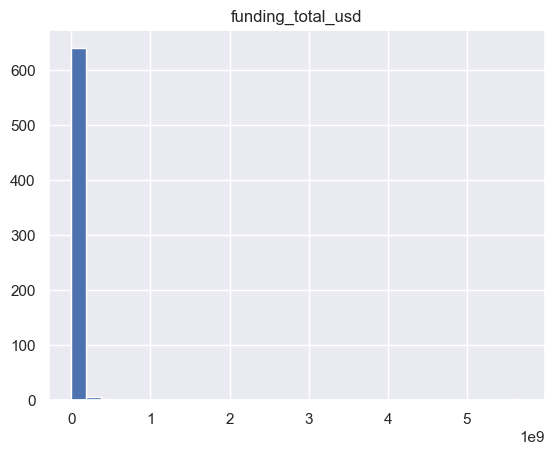

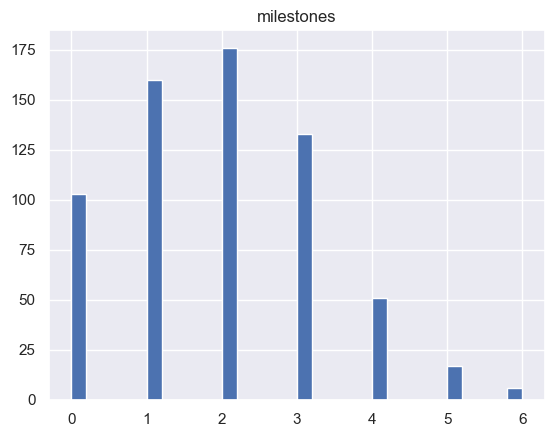

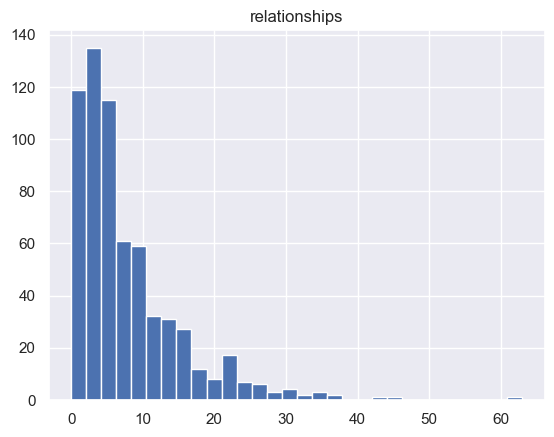

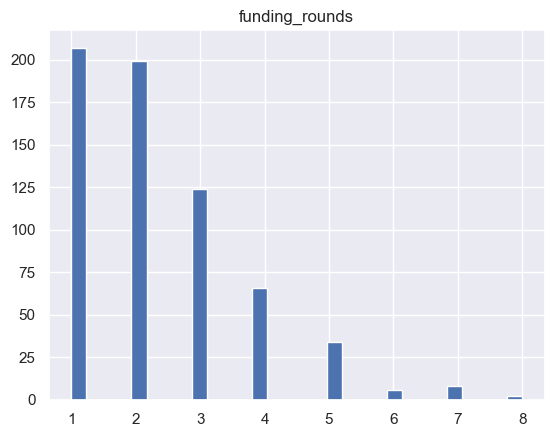

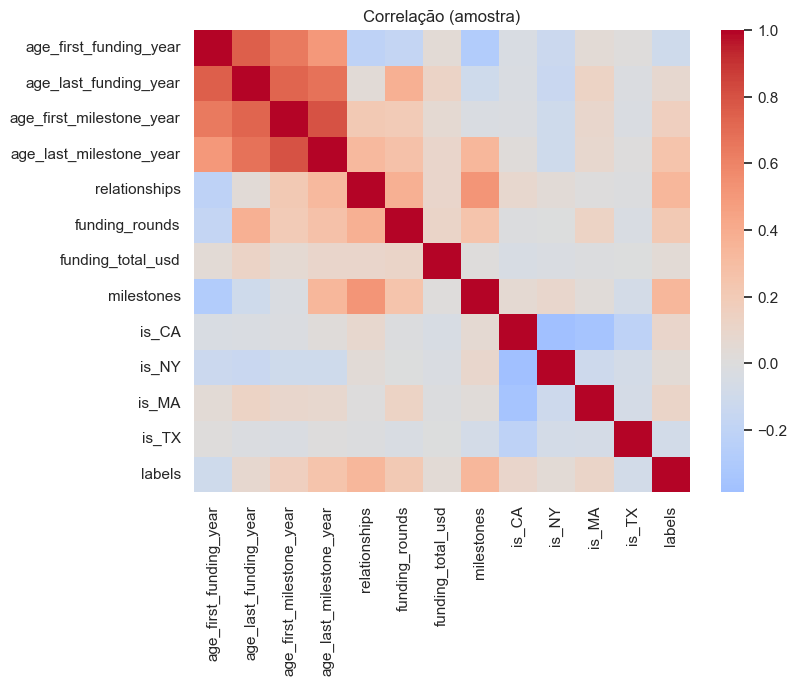

In [4]:
# histogramas de capital levantado pelas startups, e marcos alcan√ßados
for c in [x for x in ['funding_total_usd','milestones','relationships','funding_rounds'] if x in num_cols]:
    plt.figure(); plt.hist(train[c].dropna(), bins=30); plt.title(c); plt.show()

# Matrz de correl√ß√£o entre as features ultilizadas
subset = num_cols[:12]
if len(subset) >= 2:
    corr = train[subset + [TARGET_COL]].corr(numeric_only=True)
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, cmap='coolwarm', center=0)
    plt.title('Correla√ß√£o (amostra)'); plt.show()

### Resultados ###

### Hipoteses ###

Nessa parte come√ßei a formular minhas hipoteses. Primeiro, comparei as startups com funding acima e abaixo da mediana, para assim verificar se o n√≠vel de investimento poderia influenciar no resultado final. Com isso formulei minha 

***H1: "Empresas com maior funding tem melhores resultados."***

Depois, fiz a mesma compara√ß√£o usando o n√∫mero de milestones que s√£o marcos/metas das empresas, e analisar se estiverem acima ou abaixo da mediana tambem influenciavam o resultado/performamce da empresa de alguma forma. Com isso formulei minha

 ***H2: "Empresas que atigiram milestones acima da mediana tem maiores chances de sucesso."*** 

Por fim, observei a taxa de sucesso das startups por lacaliza√ß√£o, e assim formulei minha

 ***H3: " Startups localizadas nos principais Hubs de Inova√ß√£o (CA, NY, MA e TX) tendem a ter mais sucesso."***

 Agora voc√™ leitor deve estar se perguntando o porque da minha escolha de comprar minhas feauteres com a mediana das startups nas minhas hipoteses e n√£o com a m√©dia. Optei pela compara√ß√£o com a mediana,  em vez da m√©dia pelo simples fato de ser menos  sens√≠vel a outlieres. Como algumas startups levantam quantias muito altas de capital em rela√ß√£oa a outras, a m√©dia ficaria distorcida, ja que uma startup em especifico jogaria muito pro alto enquanto essa n√£o √© a realidade em uma compar√ßa√µ justa, enquanto isso a mediana  consegue achar um ponto de equil√≠brio de todas as startups.

In [5]:
# Define y como variavel alvo
y = train[TARGET_COL]

def taxa(col, cond):
    return train.loc[cond, TARGET_COL].mean()

# H1: Startups com funding acima ou abaixo da mediana
thr = train['funding_total_usd'].median()
print('Funding alto:', taxa('funding_total_usd', train['funding_total_usd'] >= thr))
print('Funding baixo:', taxa('funding_total_usd', train['funding_total_usd'] < thr))

# H2: Startups com metas alcan√ßadas acima ou abaixo da mediana
thr = train['milestones'].median()
print('Milestones alto:', taxa('milestones', train['milestones'] >= thr))
print('Milestones baixo:', taxa('milestones', train['milestones'] < thr))

# H3: localiza√ß√£o  das startups
for col in ['is_CA','is_NY','is_MA','is_TX']:
    if col in train.columns:
        print(col, '->', train.groupby(col)[TARGET_COL].mean())


Funding alto: 0.7461300309597523
Funding baixo: 0.5479876160990712
Milestones alto: 0.7676240208877284
Milestones baixo: 0.4714828897338403
is_CA -> is_CA
0    0.593857
1    0.691218
Name: labels, dtype: float64
is_NY -> is_NY
0    0.640000
1    0.704225
Name: labels, dtype: float64
is_MA -> is_MA
0    0.629060
1    0.819672
Name: labels, dtype: float64
is_TX -> is_TX
0    0.654341
1    0.458333
Name: labels, dtype: float64


### Resultados ###


Agora com os resultados da celula anterior √© possivel analisar e comparar a acertividade das minhas hipoteses. Come√ßando com H1 do funding, as startups com valores acima da mediana apresentaram taxa de sucesso de aproximadamente  de ***74,6%***, contra apenas ***54,7%*** das outras que receberam menos investimento. Isso confirma minha H1 que foi "Empresas com maior funding tem melhores resultados."

Ja em rela√ß√£o a minha H2, os resultados mostraram uma diferen√ßa ainda maior. As startups com mais marcos do que a mediana tiveram taxa de sucesso de aproximadamente de ***76,7%***, enquanto o resto ficou por volta ***47%***. Esse resultado confirmou minha H2 que foi: "Empresas que atigiram milestones acima da mediana tem maiores chances de sucesso."

Ja na minha H3 ha acertos e erros, em rela√ß√£o a tendencia da localiza√ß√£o gerar melhor performance nas empresas. Come√ßando por  Startups na Calif√≥rnia (CA) tiveram uma taxa de sucesso maior de ***69%*** em rel√ß√£o do restante ***59,3%***, em Nova Iorque (Ny)  isso tambem se confirmou com m√©dia de aprox ***70%*** contra ***64%*** do restante. Ja em Massachusetts (MA) houve a diferen√ßa mais expressiva quase ***82%*** na taxa de sucesso contra ***62,9%*** do restante. Por fim, Texas (TX) foi a unica localiza√ß√£o na qual minha tese n√£o se confirmou, no qual  a taxa de sucesso ficou em apenas ***45,8%***. Por fim √© notorio que grande parte da minha H3 foi confrimada, e a apenas um estado entre os principais teve performance de sucesso abaixo o que pode indicar um ponto fora da curva mesmo.



### Pr√© Processamento 2 ###


Nessa parte come√ßei a fazer um pr√© processamento mais avan√ßado. Aqui eu come√ßei separando as vari√°veis independentes (X) da vari√°vel alvo (y) e preparei tamb√©m um conjunto de teste. 
Tamb√©m voltei a separar as colunas num√©ricas e categ√≥ricas.

Para as vari√°veis num√©ricas, defini um pipeline para preencher os valores nulos com a mediana e depois padronizar-los  para que fiquem na mesma escala usando o `StandardScaler`. J√° para as vari√°veis preenchi os valores nulos com a moda e depois transformei cada categoria em colunas bin√°rias atrav√©s do One-Hot Encoding. Ao final, com  Esses dois pipelines fiz uma jun√ß√£o  em um  unico `ColumnTransformer`, que garante que cada etapa seja aplicada corretamente em cada grupo de colunas.  

Por fim, dividi os dados em treino e valida√ß√£o (80 treino/20 valida√ß√£o), estratificando a vari√°vel alvo para manter a propor√ß√£o entre as classes. Com essa divis√£o eu consigo treinar com eficacia e deixar que tenha vazamento de informa√ß√£o entre o treino o teste assim deixando o modelo mais rwalista na avalia√ß√£o.



In [6]:
# Separar features (X) e target (y)
X = train.drop(columns=[TARGET_COL]) # todas colunas menos a alvo
y = train[TARGET_COL] # coluna alvo
X_test = test.copy() # conjunto de teste

# Identificar colunas num√©ricas e categ√≥ricas e exclui ID
num_cols = [c for c in X.columns if c != ID_COL and pd.api.types.is_numeric_dtype(X[c])]
cat_cols = [c for c in X.columns if c != ID_COL and not pd.api.types.is_numeric_dtype(X[c])]

print(f"Colunas num√©ricas: {len(num_cols)} | Colunas categ√≥ricas: {len(cat_cols)}")

# Pipelines para categorias numericas
# Imputa√ß√£o com mediana nos valores nulos + padroniza√ß√£o com standartscaler
numeric_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler(with_mean=False))
])

# Pipelines para categorias categ√≥ricas
# Imputa√ß√£o com moda nos valores nulos
# onehotencoder para transformar em colunas bin√°rias
categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=True))

])

# ColumnTransformer unindo tudo
preprocess = ColumnTransformer([
    ('num', numeric_pipe, num_cols),
    ('cat', categorical_pipe, cat_cols)
], remainder='drop')

# Split treino/valida√ß√£o 80/20
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)

X_train.shape, X_valid.shape, y_train.mean(), y_valid.mean()


Colunas num√©ricas: 30 | Colunas categ√≥ricas: 1


((516, 32),
 (130, 32),
 np.float64(0.6472868217054264),
 np.float64(0.6461538461538462))

### Modelo Random Forest ###

Agora com toda base ja ajustada, fiz meu modelo de random forest completo. Eu optei pela escolha do modelo de random forest pois pelas regras que n√£o podiam modelos de regress√£o ou uso de XGBOOST acredito que o random forest √© com maior diversifica√ß√£o para chegar a uma acur√°cia minima de 80%. Isso se da pelo fato que o Random j√° um modelo que lida com menos overfitting e vises ja que diferentememte da arvore de desi√ß√£o normal, ele cria diversas arvores que usam parte do dataset realiznado a media de cada arvore e assim chegando a uma previs√£o. Tambem √© um modelo que √© possivel ajustar bem hisperparametros como limita√ß√£o de cria√ß√£o de arvores ou escolher a profundiade de cada arvore, foi possoivel ajustar diversas vezes at√© chegar a acur√°cia necessaria.

Primeiramente preparei fun√ß√µes auxiliares para localizar os arquivos de treino e teste e identificar automaticamente as colunas ID e target. Agora entramos na parte de limpeza do dataset que foi minima, apenas  removi algumas duplicatas, tambem retirei colunas que poderiam gerar vazamento de informa√ß√£o e o resultado entregue pro modelo como "status" e "outcome" e denovo seprai  as  minhas features entre num√©ricas e categ√≥ricas.

Realizei novamnete uma imputa√ß√£o da mediana nos valores numericos. E  apliquei tamb√©m PolynomialFeatures que foi uma recomenda√ß√£o de uma integrante do meu grupo de trabalho, para gerar melhores intera√ß√µes entre  as minhas vari√°veis. J√° nas categ√≥ricas, fiz o mesmo da celula passada ultilizei a moda junto com hotencoder.

Come√ßei a definir hiperpar√¢metros base para o Random Forest, como n√∫mero de √°rvores (n_estimators=1200), peda√ßos de vari√°veis consideradas em cada divis√£o (max_features=0.3), tamanho m√≠nimo das folhas e divis√µes, al√©m de testar diferentes profundidades das √°rvores (14, 18, 22 e ilimitada). Toda essa parte foi feita apartir de ajustes em todos hiperparametros at√© chegar na acuracia ideal no kaggle. O resultado do codigo foi essencial pra eu conseguir saber onde eu tinha qu eajustar os paraemetros pra chegar na melhor acur√°cia.

Apos ajustar os hiperpar√¢metros, fiz a valida√ß√£o usando 5 divis√µes do conjunto de dados  (StratifiedKFold). Em cada divis√£o, testei o modelo e calculei as previs√µes para os dados que ficaram de fora. Com esses resultados, consegui avaliar a acur√°cia em diferentes pontos de corte (thresholds) e escolhi o que trouxe o melhor desempenho. Depois apenas peguei os melhores resutados e treinei o modelo inteiro de uma vez.

Por fim, cirei um csv com as colunas id e labels para conseguir entregar no kaggle e ver minha acuracia na plataforma.

In [7]:

import numpy as np, pandas as pd, warnings, os, re
from pathlib import Path
warnings.filterwarnings("ignore")

#  faz busca dos arquivos no padr√£o kaggle e vscode
def _find_files(names_or_regex, roots=(Path('.'), Path('/kaggle/input'))):
    cand, seen = [], set()
    pats = [re.compile(p) for p in (names_or_regex if isinstance(names_or_regex,(list,tuple)) else [names_or_regex])]
    for root in roots:
        if not root.exists(): 
            continue
        for dp,_,fs in os.walk(root):
            for fn in fs:
                for pat in pats:
                    if pat.fullmatch(fn) or pat.search(fn):
                        p = Path(dp)/fn
                        if p not in seen:
                            cand.append(p); seen.add(p)
    return cand

# descobre automaticamente  a coluna id e alvo
def _detect_cols(train, test):
    COMMON_TARGETS = ['labels','label','target','Survived','y']
    TARGET_COL = next((c for c in COMMON_TARGETS if c in train.columns and c not in test.columns), 'labels')
    shared = [c for c in train.columns if c in test.columns]
    ID_COL = 'id' if 'id' in shared else (shared[0] if shared else 'id')
    return TARGET_COL, ID_COL

# carrega treino e teste se nao tiver na memoria
if 'train' not in globals() or 'test' not in globals():
    tps = _find_files([r'^train\.csv$', r'train.*\.csv'])
    vps = _find_files([r'^test\.csv$',  r'test.*\.csv'])
    assert tps and vps, "Coloque train/test no diret√≥rio ou carregue em mem√≥ria."
    train = pd.read_csv(sorted(tps, key=lambda p: len(str(p)))[0])
    test  = pd.read_csv(sorted(vps, key=lambda p: len(str(p)))[0])

# faz a leitura do sample submisson csv para colunas e linhas
sample = globals().get('sample', None)
if sample is None:
    for p in [Path('sample_submission.csv'), Path('/kaggle/input/sample_submission.csv')]:
        if p.exists():
            try: sample = pd.read_csv(p); break
            except: pass

# fun√ß√£o de adicionar features extras opcionalmente
if 'add_features' not in globals():
    def add_features(df): return df.copy()

# detecta colunas alvo e id e garantem sua existencia
TARGET_COL, ID_COL = _detect_cols(train, test)
assert TARGET_COL in train.columns, f"TARGET_COL '{TARGET_COL}' n√£o est√° no train."
assert ID_COL in test.columns, f"ID_COL '{ID_COL}' n√£o est√° no test."

# adiciona features extras
train_fe = add_features(train).copy()
test_fe  = add_features(test).copy()

# remove as colunas duplicadas (se houver) se nao tiver ignorar
if ID_COL in train_fe: train_fe = train_fe.drop_duplicates(subset=[ID_COL], keep='last').reset_index(drop=True)
if ID_COL in test_fe:  test_fe  = test_fe.drop_duplicates(subset=[ID_COL], keep='last').reset_index(drop=True)

# Limpeza minima
# remove colunas propicias de vazamento
LEAKY = [c for c in ['status','closed_at','is_acquired','is_shutdown','went_public','outcome','future_flag'] if c in train_fe]
if LEAKY:
    train_fe = train_fe.drop(columns=LEAKY) # limpeza usando drop
    test_fe  = test_fe.drop(columns=[c for c in LEAKY if c in test_fe], errors='ignore')

# monta X/y SEM contar o ID
X = train_fe.drop(columns=[TARGET_COL, ID_COL], errors='ignore').copy()
y = train_fe[TARGET_COL].astype(int).copy()
X_test = test_fe.drop(columns=[ID_COL], errors='ignore').copy()

# tipos de colunas
import pandas.api.types as ptypes
num_cols = [c for c in X.columns if ptypes.is_numeric_dtype(X[c])]
cat_cols = [c for c in X.columns if not ptypes.is_numeric_dtype(X[c])]
print(f"Columns -> num={len(num_cols)} | cat={len(cat_cols)} | y.mean()={y.mean():.3f}")

# processamento
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures

# Colunas Num√©ricas: 
# faz imput da mediana nos nulos
#  gera termos polinominais de grau 2 o
num_pipe_base = SimpleImputer(strategy='median', add_indicator=True)
num_pipe_poly = Pipeline([
    ('imp', SimpleImputer(strategy='median', add_indicator=True)),
    ('poly', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False))
])

# Categ√≥ricas: 
# imputa√ß√£o dos mais frequentas (moda)  
# usa one hot encoder que varia de 0-1
cat_pipe = Pipeline([
    ('imp', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=True))
])

# uso ColumnTransformer jun√ß√£o piplelines
def make_preprocess(use_poly: bool):
    return ColumnTransformer(
        transformers=[
            ('num', num_pipe_poly if use_poly else num_pipe_base, [c for c in num_cols if c in X.columns]),
            ('cat', cat_pipe, [c for c in cat_cols if c in X.columns]),
        ],
        remainder='drop',
        sparse_threshold=0.3
    )


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# lista hiperpar√¢metros do random
BASE_PARAMS = dict(
    n_estimators=1200,       # mais arvores
    max_features=0.3,        # menos features por arvore
    min_samples_leaf=2,      # mais amostras por folha
    min_samples_split=5,     # ajuste do split isso foi feito diversas vezes
    class_weight=None,
    random_state=42,         # padr√£o 42
    n_jobs=-1,
    bootstrap=True
)

DEPTHS = [14, 18, 22, None]     # aumenta profundidade das arvores
USE_POLY = [False, True]        #  uso polinomial

K = 5 # K-Fold
skf = StratifiedKFold(n_splits=K, shuffle=True, random_state=42)

results = []
best_cfg = None
best_oof_acc = -1.0
best_t_for_best = 0.5

for use_poly in USE_POLY:
    for depth in DEPTHS:
        params = BASE_PARAMS.copy()
        params['max_depth'] = depth

        preprocess = make_preprocess(use_poly)
        pipe = Pipeline([('prep', preprocess),
                         ('clf', RandomForestClassifier(**params))])

        # previsoes do OOF
        oof_pred = np.zeros(len(y), dtype=float)
        for tr_idx, va_idx in skf.split(X, y):
            X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
            y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]
            pipe.fit(X_tr, y_tr)
            oof_pred[va_idx] = pipe.predict_proba(X_va)[:,1]

        # threshold com melhor acur√°cia do OOF
        ths = np.linspace(0.10, 0.90, 161)
        accs = [accuracy_score(y, (oof_pred>=t).astype(int)) for t in ths]
        i = int(np.argmax(accs))
        oof_acc = float(accs[i]); best_t = float(ths[i])
        results.append((use_poly, depth, oof_acc, best_t))
        print(f"[OOF] poly={use_poly} | max_depth={depth} -> ACC={oof_acc:.4f} | best_t={best_t:.3f}")
        
        # aramazena a melhor configura√ß√£o
        if oof_acc > best_oof_acc:
            best_oof_acc = oof_acc
            best_cfg = (use_poly, depth)
            best_t_for_best = best_t

print("\nüèÅ Melhor config:", {"use_poly": best_cfg[0], "max_depth": best_cfg[1]}, f"| OOF_ACC={best_oof_acc:.4f} | best_t={best_t_for_best:.3f}")

# faz retreino com os melhores ajustes
use_poly_best, depth_best = best_cfg
best_params = BASE_PARAMS.copy()
best_params['max_depth'] = depth_best

preprocess_best = make_preprocess(use_poly_best)
final_pipe = Pipeline([('prep', preprocess_best),
                       ('clf', RandomForestClassifier(**best_params))])

final_pipe.fit(X, y)
proba_test = final_pipe.predict_proba(X_test)[:,1] #predi√ß√£o
y_pred_sub = (proba_test >= best_t_for_best).astype(int)


if sample is not None and sample.shape[1] >= 2:
    id_header, label_header = sample.columns[0], sample.columns[1]
else:
    id_header, label_header = ID_COL, TARGET_COL

# Gera o arquivo csv com as labels e id
submission = pd.DataFrame({id_header: test_fe[ID_COL].values, label_header: y_pred_sub})
submission.to_csv('submission.csv', index=False)
print("‚úÖ submission.csv salvo com:", {"use_poly": use_poly_best, "max_depth": depth_best, **best_params})
print(submission.head())


Columns -> num=30 | cat=1 | y.mean()=0.647
[OOF] poly=False | max_depth=14 -> ACC=0.7972 | best_t=0.525
[OOF] poly=False | max_depth=18 -> ACC=0.7972 | best_t=0.515
[OOF] poly=False | max_depth=22 -> ACC=0.7972 | best_t=0.515
[OOF] poly=False | max_depth=None -> ACC=0.7972 | best_t=0.515
[OOF] poly=True | max_depth=14 -> ACC=0.7833 | best_t=0.560
[OOF] poly=True | max_depth=18 -> ACC=0.7833 | best_t=0.455
[OOF] poly=True | max_depth=22 -> ACC=0.7848 | best_t=0.555
[OOF] poly=True | max_depth=None -> ACC=0.7848 | best_t=0.555

üèÅ Melhor config: {'use_poly': False, 'max_depth': 14} | OOF_ACC=0.7972 | best_t=0.525
‚úÖ submission.csv salvo com: {'use_poly': False, 'max_depth': 14, 'n_estimators': 1200, 'max_features': 0.3, 'min_samples_leaf': 2, 'min_samples_split': 5, 'class_weight': None, 'random_state': 42, 'n_jobs': -1, 'bootstrap': True}
    id  labels
0   70       1
1   23       0
2  389       1
3  872       1
4  920       0


### Resultados ###

Primeiramente venho dizer que o modelo final de random forest n√£o usou polinomios, pois o modelo configurou que a melhor performance seria n√£o ultilizar-lo, mesmo que documentei anteriormente que usaria pois anteriormente eu estava usando mas no modelo final optei por n√£o usar ja que o modelo previu que nao era necessario.

Com os resultados..  diferentes profundidades de √°rvore foram avaliadas, tanto com quanto sem PolynomialFeatures. Com o uso de  polin√¥mios, a acur√°cia variou entre 78,3% e 78,4%, enquanto nos cen√°rios sem polin√¥mios a acur√°cia chegou a ter 79,7%, o que monstra um cenario favoravel a n√£o usar polinomios ao final e optar pelo mais simples. Ademais, o  threshold deu otimos resultados  para classifica√ß√£o se mantendo em estavel em torno de 0.515‚Äì0.525.

Logo, a melhor configura√ß√£o final selecionada foi ultilizando max_depth=14, sem polin√¥mios, e assim alcan√ßando alcan√ßando acur√°cia de 79,72% e um threshold de 0.525. O modelo foi treinado novamente por completo, usando 1200 √°rvores, max_features=0.3, min_samples_leaf=2 e min_samples_split=5. 

Por fim, Concluo que os testes mostraram a import√¢ncia de realizar o ajustes com hiperpar√¢metros. A quest√£o do uso polinominal parecia promissor cmo minha colega do grupo havia mencionado, e como mostra aqui o uso dele conseguiu mostrar boas acuracias, mas ao fim foi provado que sem o uso dele a acuracia aumentava e o modelo se beneficiava mais com uso do simples, isso √© comum quando se usa random forest pois o obejtivo dopolinomio seria o aumento no numero de features para gerar mais intera√ß√µes, porem o random forest ja √© um modelo que sozinho consegue aprender e entender as features sozinho, por pegar parte do dataset e fazer medias de predi√ß√µes, por isso n√£o era necessario uso de polinomios e a falta dele n√£o aumentaria a acur√°cia, se estivessimos falando de outro modelo a historia poderia ser diferente.  Dessa forma, o Random Forest final apresentou um acuracia necessaria e  pronto para a submiss√£o oficial

